# Obesity Detection Project

## Exclusive Summary

The purpose of this project is to help obese people and healthcare organizations explore the main causes of obesity. The team analyzed 2,111 health condition records from Mexico, Peru, and Colombia, including 16 variables, and performed exploratory data analysis to fix outliers. In the process of predicting obesity, the team used linear regression, logistic regression, and CART models, and sought the best prediction model based on the generalization ability of the model.

In the end, the team found that the CART model had the highest accuracy (78%), precision (77%), and recall (78%), which means that this model is the best model for predicting obesity. According to the results of the Cart model, age, height, frequency of vegetable consumption, number of main meals, and time using technological devices are the five most important indicators affecting obesity, with importance scores of 15.4%, 14.5%, 12.5%, 10.4%, and 8.9%, respectively.

In [34]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pandas.api.types import CategoricalDtype

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import xgboost as xgb

## Exploratory Data Analysis

### Data Description

In [3]:
# Import Data
obesity_df = pd.read_excel('ObesityDataSet.xlsx',sheet_name='ObesityDataSet')
display(obesity_df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
# See the description for each column
pd.read_excel('ObesityDataSet.xlsx',sheet_name='Data Dictionary')

,Data value,Description,Data Type
0,Gender,Gender,Binary
1,Age,Age,Numerical
2,Height,Height,Numerical
3,Weight,Weight,Numerical
4,family_history_with_overweight,family_history_with_overweight,Binary
5,FAVC,Frequent consumption of high caloric food,Binary
6,FCVC,Frequency of consumption of vegetables,Ordinal (1: least to 3: highest)
7,NCP,Number of main meals,Ordinal (1: least to 4: highest)
8,CAEC,Consumption of food between meals,categorical
9,SMOKE,Smoker?,Binary


In [5]:
# Check data type and missing value
print(obesity_df.info())

# Check statistical summary
display(obesity_df.describe().round(2))

# Check objective value
for i in obesity_df.columns:
    if obesity_df[i].dtypes == 'object':
        print(f'Unique Value in {i} Column:')
        print(obesity_df[i].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


Unique Value in Gender Column:
['Female' 'Male']
Unique Value in family_history_with_overweight Column:
['yes' 'no']
Unique Value in FAVC Column:
['no' 'yes']
Unique Value in CAEC Column:
['Sometimes' 'Frequently' 'Always' 'no']
Unique Value in SMOKE Column:
['no' 'yes']
Unique Value in SCC Column:
['no' 'yes']
Unique Value in CALC Column:
['no' 'Sometimes' 'Frequently' 'Always']
Unique Value in MTRANS Column:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique Value in NObeyesdad Column:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Based on the description data, we haven't seen any obvious errors.

### Distribution Analysis

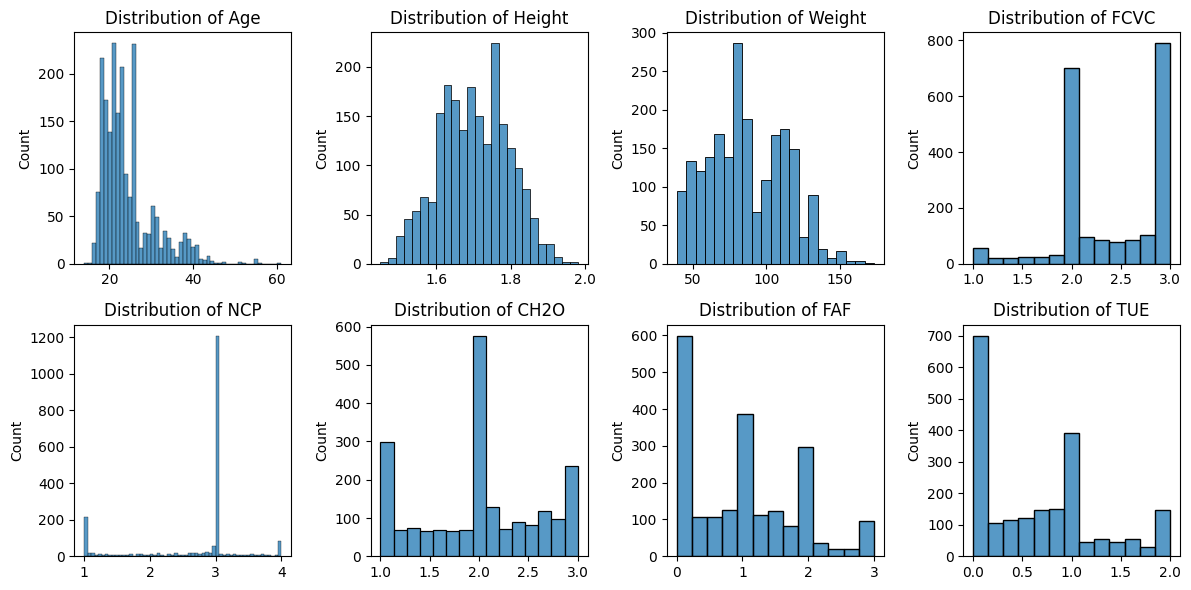

In [6]:
# Check distribution for numerical data
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for i, column in enumerate(numerical_columns):
  sns.histplot(data=obesity_df, x=column, ax = axs[i//4, i%4])
  axs[i//4, i%4].set_title(f'Distribution of {numerical_columns[i]}')
  axs[i//4, i%4].set_xlabel("")

plt.tight_layout()
plt.show()

From this set of histograms, we did not find any obvious outliers for the numeric data.
However, Age ranges from 14 to 61, with a mean age of 24.3. The dataset predominantly comprises younger individuals, possibly due to the online survey method.

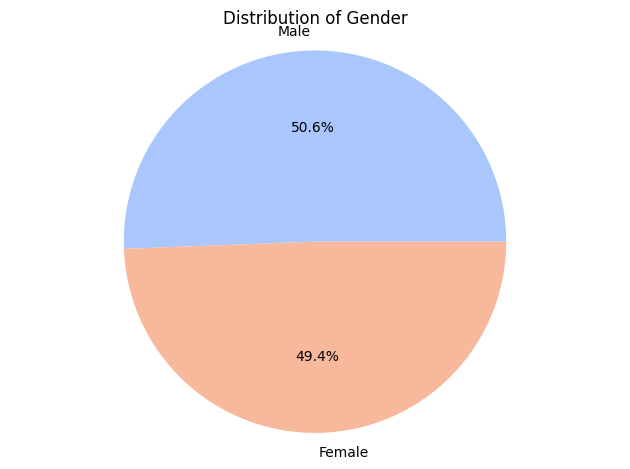

In [7]:
# Let see the distribution for gender
gender_counts = obesity_df['Gender'].value_counts()

# Plot a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(gender_counts)))
plt.title('Distribution of Gender')
plt.axis('equal')
plt.tight_layout()

plt.show()

The database is not biased with respect to gender.

C:\Users\Weihan Weng\AppData\Local\Temp\ipykernel_8820\1046666777.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = obesity_df, x = 'NObeyesdad', order = new_order, palette = 'coolwarm')


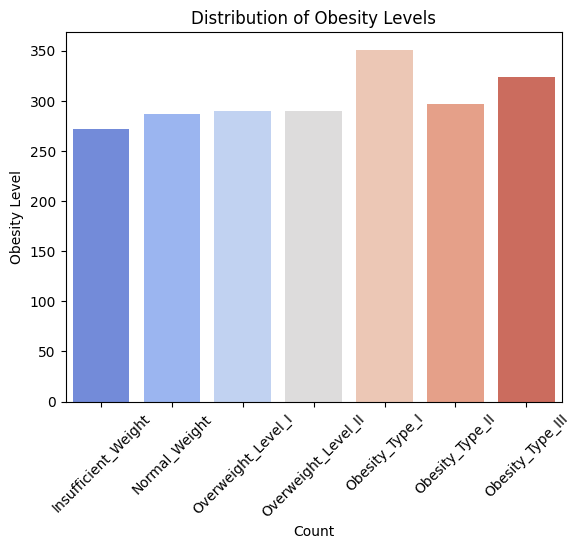

In [8]:
# Countplot for obesity levels
new_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
             'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

sns.countplot(data = obesity_df, x = 'NObeyesdad', order = new_order, palette = 'coolwarm')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Count')
plt.ylabel('Obesity Level')
plt.xticks(rotation = 45)

plt.show()

**According to the actual situation:**

· BMI less than 18.5 is insufficient

· 18.5<=BMI<25 is normal

· 25<=BMI<30 is overweight

· BMI>= 30 is obesity

C:\Users\Weihan Weng\AppData\Local\Temp\ipykernel_8820\2615837535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=obesity_df, x='NObeyesdad', y='Age', palette='YlOrBr', order = new_order)


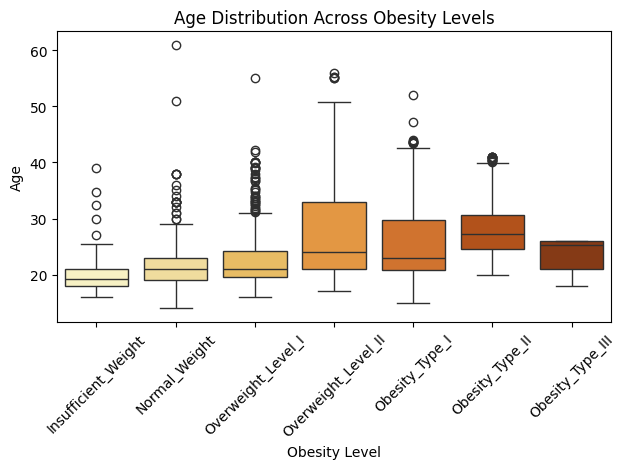

In [9]:
# Plot boxplot that indicates age distribution across obesity levels
sns.boxplot(data=obesity_df, x='NObeyesdad', y='Age', palette='YlOrBr', order = new_order)
plt.title('Age Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.xticks(rotation=45)
plt.ylabel('Age')
plt.tight_layout()

plt.show()

**Median Age:** Increases with higher obesity levels.

**Age Range:** Widest in Normal Weight and Overweight Level I; narrowest in Obesity Type III.

**Outliers:** Present in all categories, showing age variability.

**Interquartile Range:** Larger in higher obesity levels, indicating more age variability.

**Skewness:** Normal Weight slightly right-skewed; Obesity Type I left-skewed.

**Higher obesity levels generally correlate with older age groups.**

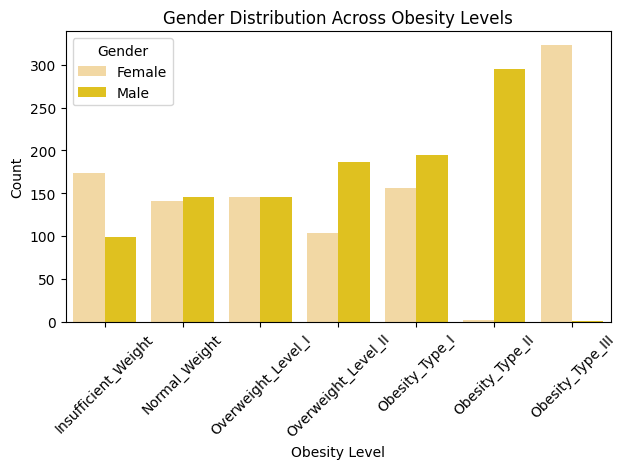

In [10]:
# Plot the gender distribution across obseity levels
sns.countplot(data=obesity_df, x='NObeyesdad', order=new_order, hue='Gender',
              palette={'Female': '#FFDC97', 'Male': 'gold'})
plt.title('Gender Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

Splitting the gender categories for obesity distribution reveals a higher prevalence of males in other obesity categories, with noticeable gender bias observed in obesity types II and III.

### Correlation Analysis

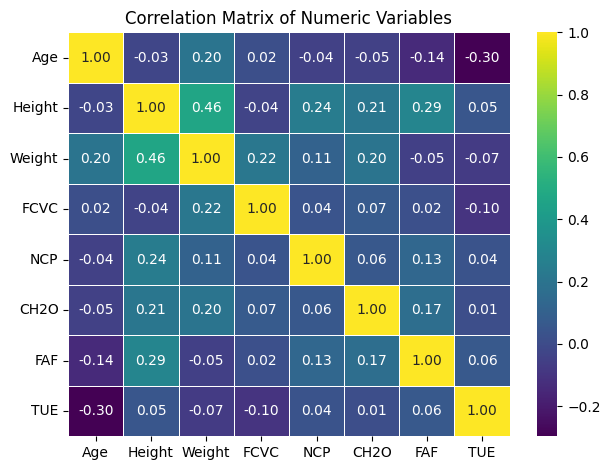

In [11]:
full_corr_matrix = obesity_df.select_dtypes(include=[np.number]).corr()

# Plot the heatmap for the full correlation matrix
sns.heatmap(full_corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()

plt.show()

**Insights:** Height and Weight show a strong positive correlation, which is expected as taller individuals generally weigh more.

**Conclusion:** Either Height or Weight can be dropped from our key variables, and we decided to remove Weight. Height tends to remain relatively constant for adults, while weight can fluctuate due to various factors.

## Data Modification

### Transformation of Target Variable

In [12]:
# Rename columns
column_rename_dict = {
    'NObeyesdad': 'obesity',
    'MTRANS': 'transportation_mode',
    'FAVC': 'frequency_consumption_of_high_calorie_food',
    'FCVC': 'frequency_consumption_of_vegetables',
    'NCP': 'number_of_main_meals',
    'CAEC': 'consumption_of_food_between_meals',
    'SMOKE': 'smoker',
    'CH2O': 'consumption_of_water_daily',
    'SCC': 'calorie_consumption_monitoring',
    'FAF': 'physical_activity_frequency',
    'TUE': 'time_using_technology_devices',
    'CALC': 'consumption_of_alcohol'

}
obesity_df.rename(columns=column_rename_dict, inplace=True)
# Convert column names to lowercase
obesity_df.rename(columns=lambda x: x.lower(), inplace=True)
print("New Column Names: ", obesity_df.columns)

New Column Names:  Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'frequency_consumption_of_high_calorie_food',
       'frequency_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'smoker',
       'consumption_of_water_daily', 'calorie_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol', 'transportation_mode', 'obesity'],
      dtype='object')


In [13]:
# Transformation of target variable
print("Obesity types and values before transformation: \n",obesity_df["obesity"].value_counts())

# Map the values of the obesity and overweight columns to handle class imbalance
obesity_df["obesity"] = obesity_df["obesity"].replace('Overweight_Level_II', 'Overweight_Level_I_and_II')
obesity_df["obesity"] = obesity_df["obesity"].replace('Overweight_Level_I', 'Overweight_Level_I_and_II')
obesity_df["obesity"] = obesity_df["obesity"].replace('Obesity_Type_II', 'Obesity_Type_II_and_III')
obesity_df["obesity"] = obesity_df["obesity"].replace('Obesity_Type_III', 'Obesity_Type_II_and_III')

print("Obesity types and values after transformation: \n",obesity_df["obesity"].value_counts())


#Convert obesity to ordinal variable for better prediction capability
cat_type = CategoricalDtype(categories=['Insufficient_Weight', 'Normal_Weight',
                                        'Overweight_Level_I_and_II',
                                        'Obesity_Type_I', 'Obesity_Type_II_and_III'], ordered=True)
obesity_df["obesity"] = obesity_df["obesity"].astype(cat_type)

Obesity types and values before transformation: 
 obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64
Obesity types and values after transformation: 
 obesity
Obesity_Type_II_and_III      621
Overweight_Level_I_and_II    580
Obesity_Type_I               351
Normal_Weight                287
Insufficient_Weight          272
Name: count, dtype: int64


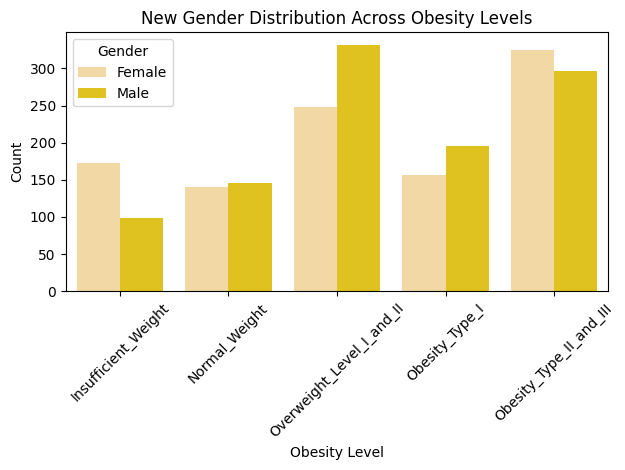

In [14]:
# Plot the new gender distribution across obseity levels
sns.countplot(data=obesity_df, x='obesity', hue='gender',
              palette={'Female': '#FFDC97', 'Male': 'gold'})
plt.title('New Gender Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

The data suggests a higher count of females in lower obesity levels. Combining obesity type II and III into one category, as well as grouping overweight categories together, would reduce model complexity.

### Transformation of Independent Variables

In [15]:
# Transformation of Binary Variables
# Convert to 1 and 0
binary_map = {'yes':1, 'no':0}

# Binary Variables

# FAVC
obesity_df['frequency_consumption_of_high_calorie_food'] = obesity_df['frequency_consumption_of_high_calorie_food'].map(binary_map)

# Gender
obesity_df['gender'] = obesity_df['gender'].map({'Male':1, 'Female':0})

# SCC
obesity_df['calorie_consumption_monitoring'] = obesity_df['calorie_consumption_monitoring'].map(binary_map)

# Smoke
obesity_df['smoker'] = obesity_df['smoker'].map(binary_map)

# Family_history_with_overweight
obesity_df['family_history_with_overweight'] = obesity_df['family_history_with_overweight'].map(binary_map)

# Transformation of Ordinal Variables
# Ordinal Variables
ordinal_map={'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}

# Modiy CAEC
obesity_df['consumption_of_food_between_meals'] = obesity_df['consumption_of_food_between_meals'].map(ordinal_map)
#Modiy CALC
obesity_df['consumption_of_alcohol'] = obesity_df['consumption_of_alcohol'].map(ordinal_map)

In [16]:
# Transform Transportation column into Dummy variables
print("Value Counts before transformation: ", obesity_df['transportation_mode'].value_counts())
# Converge the Motorbike and Automobile columns
obesity_df['transportation_mode'] = obesity_df['transportation_mode'].replace({'Automobile':'transport_automatic'})
obesity_df['transportation_mode'] = obesity_df['transportation_mode'].replace({'Motorbike':'transport_automatic'})
obesity_df['transportation_mode'] = obesity_df['transportation_mode'].replace({'Public_Transportation':'transport_automatic'})
obesity_df['transportation_mode'] = obesity_df['transportation_mode'].replace({'Walking':'transport_physical'})
obesity_df['transportation_mode'] = obesity_df['transportation_mode'].replace({'Bike':'transport_physical'})
print("Value Counts after transformation: ", obesity_df['transportation_mode'].value_counts())

transportation_map= {"transport_physical":0,"transport_automatic":1}
# Apply Binary transformation to transportation variable
obesity_df['transportation_mode'] = obesity_df['transportation_mode'].map(transportation_map)

# print df after transformation
display(obesity_df)

Value Counts before transformation:  transportation_mode
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
Value Counts after transformation:  transportation_mode
transport_automatic    2048
transport_physical       63
Name: count, dtype: int64


,gender,age,height,weight,family_history_with_overweight,frequency_consumption_of_high_calorie_food,frequency_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoker,consumption_of_water_daily,calorie_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_mode,obesity
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,Overweight_Level_I_and_II
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,1,Overweight_Level_I_and_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1,Obesity_Type_II_and_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1,Obesity_Type_II_and_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1,Obesity_Type_II_and_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1,Obesity_Type_II_and_III


Simplified transportation modes are classified into whether or not autonomous transportation is used.

In [17]:
# Check the data types to make sure all are as per the requirement of the model
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   gender                                      2111 non-null   int64   
 1   age                                         2111 non-null   float64 
 2   height                                      2111 non-null   float64 
 3   weight                                      2111 non-null   float64 
 4   family_history_with_overweight              2111 non-null   int64   
 5   frequency_consumption_of_high_calorie_food  2111 non-null   int64   
 6   frequency_consumption_of_vegetables         2111 non-null   float64 
 7   number_of_main_meals                        2111 non-null   float64 
 8   consumption_of_food_between_meals           2111 non-null   int64   
 9   smoker                                      2111 non-null   int64   
 10  

## Modeling

### Linear Regression - Predict obesity level by predicting BMI

**Model Methodology**

• BMI is calculated using the height and weight parameters present in the dataset in our original dataset.

• This new BMI parameter is used as the target variable to predict the Obesity level of a person.

• Linear regression is used to predict BMI with the independent variables defined.

• As BMI can be mapped to Obesity levels, we attempted to use a linear model to gain better accuracy predicting a numerical target variable (BMI) and then check the classification of the actual target variable (Obesity).

#### Modeling Training

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Create the BMI variable to predict and round it to 2 decimals
df_linear = obesity_df.copy()

# Calculate BMI
df_linear['bmi'] = df_linear['weight'] / (df_linear['height'] * df_linear['height'])
df_linear['bmi'] = round(df_linear['bmi'], 2)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_linear.drop(['bmi', 'obesity'], axis = 1).columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_linear.drop(['bmi', 'obesity'], axis = 1).values, i)
                          for i in range(len(df_linear.drop(['bmi', 'obesity'], axis = 1).columns))]
print(vif_data)

                                       feature         VIF
0                                       gender    2.891710
1                                          age   17.790612
2                                       height  133.816430
3                                       weight   22.182832
4               family_history_with_overweight    7.888233
5   frequency_consumption_of_high_calorie_food   10.265282
6          frequency_consumption_of_vegetables   25.956957
7                         number_of_main_meals   14.106382
8            consumption_of_food_between_meals    8.184311
9                                       smoker    1.054017
10                  consumption_of_water_daily   13.155903
11              calorie_consumption_monitoring    1.150296
12                 physical_activity_frequency    2.861770
13               time_using_technology_devices    2.456904
14                      consumption_of_alcohol    3.354930
15                         transportation_mode   33.5169

VIF measures the multicollinearity between each independent variable and the other independent variables. Specifically, it is calculated by regressing one independent variable as the dependent variable on the other independent variables. If the VIF value is high, it indicates that the independent variable has high collinearity with the other independent variables, which may cause the regression model to be unstable. By identifying independent variables with high VIF values, measures can be taken, such as removing or merging variables, to improve the interpretability and stability of the model.

The VIFs for height and transporatation_mode are too high, so we do not include both in the model.

In [19]:
# Train Test Split and build the Linear Model
# Split the data into features (X) and target (y)
X = df_linear.drop(['obesity', 'bmi','weight','transportation_mode'], axis=1)
y = df_linear['bmi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

#Add a constant to the X's:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit a linear regression model to the training data
linear_model = sm.OLS(y_train, X_train_const).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     92.23
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          5.36e-196
Time:                        11:51:52   Log-Likelihood:                -5418.2
No. Observations:                1688   AIC:                         1.087e+04
Df Residuals:                    1673   BIC:                         1.095e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

**Model Fit:**

· The R-squared value is 0.436, indicating that approximately 43.6% of the variability in BMI can be explained by the model.

· The adjusted R-squared value is 0.431, which accounts for the number of predictors in the model.

**Significant Predictors:**

*Gender:* Significant (p < 0.001) with a negative coefficient (-1.6365), suggesting that being female (assuming gender is coded as 1 for male and 0 for female) is associated with a lower BMI.

*Age:* Significant (p < 0.001) with a positive coefficient (0.1329), indicating that BMI increases with age.

*Height:* Significant (p < 0.001) with a positive coefficient (8.5440), suggesting that taller individuals have a higher BMI.

*Family History with Overweight:* Significant (p < 0.001) with a positive coefficient (7.3910), indicating that a family history of overweight is associated with a higher BMI.

*Frequency of High Calorie Food Consumption:* Significant (p < 0.001) with a positive coefficient (1.8832), suggesting that higher frequency of consuming high-calorie foods is associated with higher BMI.

*Frequency of Vegetable Consumption:* Significant (p < 0.001) with a positive coefficient (3.5231), indicating that higher frequency of vegetable consumption is associated with higher BMI.

*Consumption of Food Between Meals:* Significant (p < 0.001) with a negative coefficient (-3.8329), suggesting that eating between meals is associated with a lower BMI.

*Consumption of Water Daily:* Significant (p = 0.037) with a positive coefficient (0.5295), indicating that higher water consumption is associated with higher BMI.

**Non-Significant Predictors:**

*Number of Main Meals:* Not significant (p = 0.383).

*Smoker:* Not significant (p = 0.498).

These insights suggest that age, height, family history of overweight, frequency of high-calorie food consumption, frequency of vegetable consumption, and water consumption are important predictors of BMI, while gender and eating between meals have a significant impact in the opposite direction. The non-significant predictors, number of main meals and smoking status, do not appear to contribute to the model significantly.

#### Model Evaluation

In [20]:
# Function to map predicted BMI values to Obesity level
# map the bmi values to the obesity level
def bmi_to_obesity(bmi):
    """
    This function takes BMI as input and returns the corresponding obesity category.

    Parameters:
        bmi (float): Body Mass Index (BMI) value

    Returns:
        str: Obesity category
    """
    if bmi < 18.5:
        return 'Insufficient_Weight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal_Weight'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight_Level_I_and_II'
    elif 29.9 <= bmi < 34.9:
        return 'Obesity_Type_I'
    else:
        return 'Obesity_Type_II_and_III'

Classification Report:
                           precision    recall  f1-score   support

      Insufficient_Weight       0.27      0.06      0.09        54
            Normal_Weight       0.33      0.34      0.34        67
           Obesity_Type_I       0.27      0.51      0.35        83
  Obesity_Type_II_and_III       0.82      0.47      0.59       118
Overweight_Level_I_and_II       0.29      0.34      0.31       101

                 accuracy                           0.37       423
                macro avg       0.40      0.34      0.34       423
             weighted avg       0.44      0.37      0.37       423



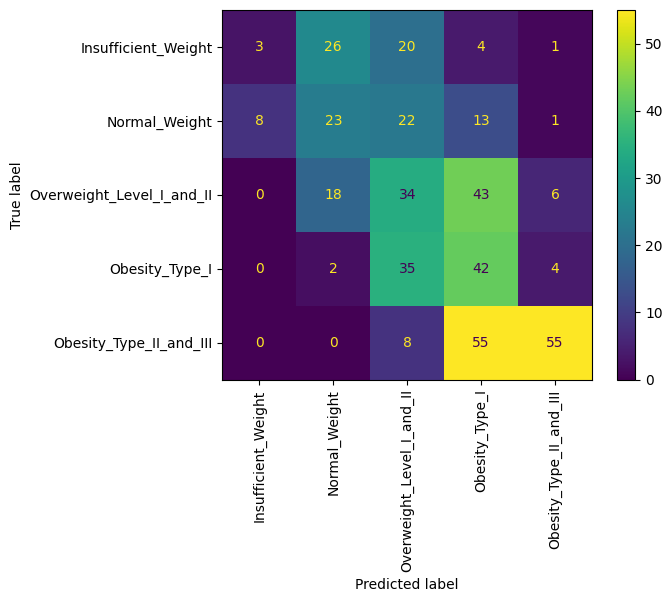

In [21]:
# Predict the BMI values using the Linear Model
# Make predictions on the testing data
y_pred = linear_model.predict(X_test_const)

# Save predictions to a df
df_comparison = pd.DataFrame({'BMI_Actual': y_test, 'BMI_Predicted': y_pred})
df_comparison["Obesity_Level_Actual"]=df_comparison['BMI_Actual'].apply(bmi_to_obesity)
df_comparison["Obesity_Level_Predicted"]=df_comparison['BMI_Predicted'].apply(bmi_to_obesity)

# Classification report
print("Classification Report:")
print(classification_report(df_comparison["Obesity_Level_Actual"], df_comparison["Obesity_Level_Predicted"]))

# Create and plot the confusion matrix
obesity_levels =['Insufficient_Weight', 'Normal_Weight','Overweight_Level_I_and_II','Obesity_Type_I', 'Obesity_Type_II_and_III']
cm = confusion_matrix(df_comparison["Obesity_Level_Actual"], df_comparison["Obesity_Level_Predicted"], labels=obesity_levels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=obesity_levels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

The model performs well inpredicting only Obesity Type I

The model performs relatively poorly predicting all other variables.

### Ordinal Logit Model

**Model Methodology**

• The target variable of Obesity Level is converted into an ordinal variable in the following order: Insufficient weight , Normal Weight, Overweight level 1 and 2, Obesity level 1 and Obesity level 2 and 3.

• We used stratify option while splitting the data in train and test to make sure that there is not class imbalance in the test set.

• The model was chosen to classify with a better accuracy as the target variable can be converted in an ordinal fashion without losing any meaning.

• We used the following parameters for logistic regression:

• Method: BFGS (Algorithm that iteratively tries to reduce the loss function)

#### Model Training

In [22]:
# Train-Test split on df
X = obesity_df.drop(['obesity', 'weight','transportation_mode'], axis=1)
y = obesity_df['obesity']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.20, stratify=y, random_state = 42)


# Feature scaling for numerical features
num_cols = ['age', 'height', 'frequency_consumption_of_vegetables', 'number_of_main_meals', 'consumption_of_water_daily', 
            'physical_activity_frequency', 'time_using_technology_devices']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("X train shape: ",X_train.shape)
print("X test shape: ",X_test.shape)
print("Y train shape: ",y_train.shape)
print("Y test shape: ",y_test.shape)

#Running the Ordinal Logit Model
mod_log = OrderedModel(y_train,X_train,distr='logit')

res_log = mod_log.fit(method='bfgs', disp=False)

#print the model Summary
print(res_log.summary())

X train shape:  (1688, 14)
X test shape:  (423, 14)
Y train shape:  (1688,)
Y test shape:  (423,)
                             OrderedModel Results                             
Dep. Variable:                obesity   Log-Likelihood:                -2147.8
Model:                   OrderedModel   AIC:                             4332.
Method:            Maximum Likelihood   BIC:                             4429.
Date:                Thu, 18 Jul 2024                                         
Time:                        11:51:54                                         
No. Observations:                1688                                         
Df Residuals:                    1670                                         
Df Model:                          14                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

#### Model Evaluation

Classification Report:
                           precision    recall  f1-score   support

      Insufficient_Weight       0.42      0.45      0.44        55
            Normal_Weight       0.44      0.07      0.12        58
           Obesity_Type_I       0.00      0.00      0.00        70
  Obesity_Type_II_and_III       0.55      0.93      0.69       124
Overweight_Level_I_and_II       0.39      0.48      0.43       116

                 accuracy                           0.47       423
                macro avg       0.36      0.39      0.34       423
             weighted avg       0.38      0.47      0.39       423



c:\Users\Weihan Weng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Weihan Weng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Weihan Weng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

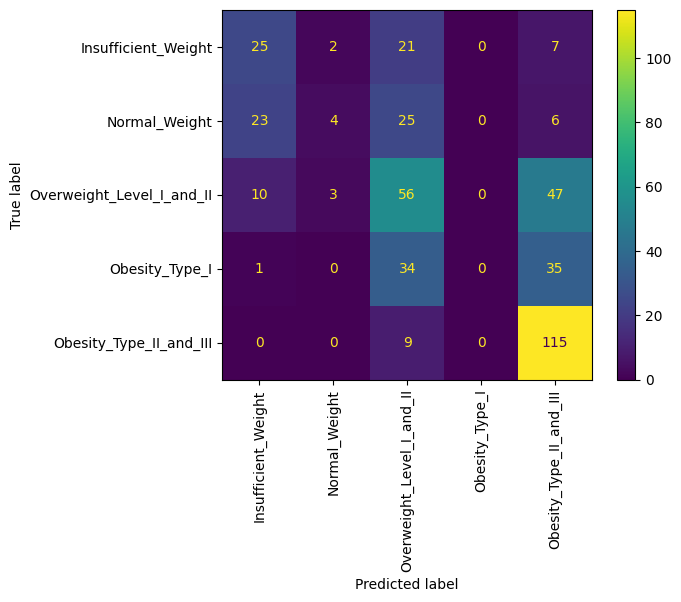

In [23]:
# Check the output of the prediction
y_pred = res_log.predict(X_test)

y_pred_labels = y_pred.idxmax(axis=1)
y_pred_labels = y_pred_labels.replace({0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I_and_II',
                                       3:'Obesity_Type_I', 4:'Obesity_Type_II_and_III'})

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels, labels=obesity_levels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=obesity_levels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

The model performs well inpredicting Insufficient Weight, Obesity Type II and III & Overweight Level I and II

The model performs relatively poorly predicting Normal Weight and Obesity level I

### CART Model

**Model Methodology**

*Decision Tree Model*

• Excluding BMI and Weight, the remaining features are used as independent variables

• Obesity Level as dependent variable

• Set 20% of total rows as test set, and applied stratifyoption while splitting the data in train and test

• Standardized independent variables that are in numerical format, that is, scaling those to a standard normaldistribution with a mean of 0 and a variance of 1

*Parameter Tuning*

• Use Grid Search to find the best decision tree model

• During this process, we tuned three parameters:

• max_depth: The maximum depth of the tree, used to control the growth depth of the tree

• min_samples_split: The minimum number of samples required for node splitting

• min_samples_leaf: the minimum number of samples required for leaf nodes

• The train set is divided into 5 parts, and each part is used as a validation set in turn for cross-validation.

*Model Assumptions*

• Independent variables are continuous features and categorical features.

• Features are independent of each other, that is, the splitting of features is not affected by other features.

• There is no linear relationship between features.

#### Model Trainning

In [24]:
# Split the data into features (X) and target (y)
X = obesity_df.drop(['obesity','weight','transportation_mode'], axis=1)
y = obesity_df['obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for numerical features
num_cols = ['age', 'height', 'frequency_consumption_of_vegetables', 'number_of_main_meals', 
            'consumption_of_water_daily', 'physical_activity_frequency', 'time_using_technology_devices']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

parameters = {
    'max_depth': [5, 10, 12, 15],  # find depth
    'min_samples_split': [2, 5, 10],  # find minimum size in each sample
    'min_samples_leaf': [1, 2, 4]  # find minimum samples leaf
}

# create a tree
decision_tree = DecisionTreeClassifier(random_state = 42)

# Built GridSearchCV
gs = GridSearchCV(estimator=decision_tree, param_grid=parameters, cv=5)

# train and fit model
gs.fit(X_train, y_train)

# see result
print(gs.best_params_)

# Here is the best model
best_decision_tree = gs.best_estimator_

# get prediction
y_pred = best_decision_tree.predict(X_test)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


Best CART Tree


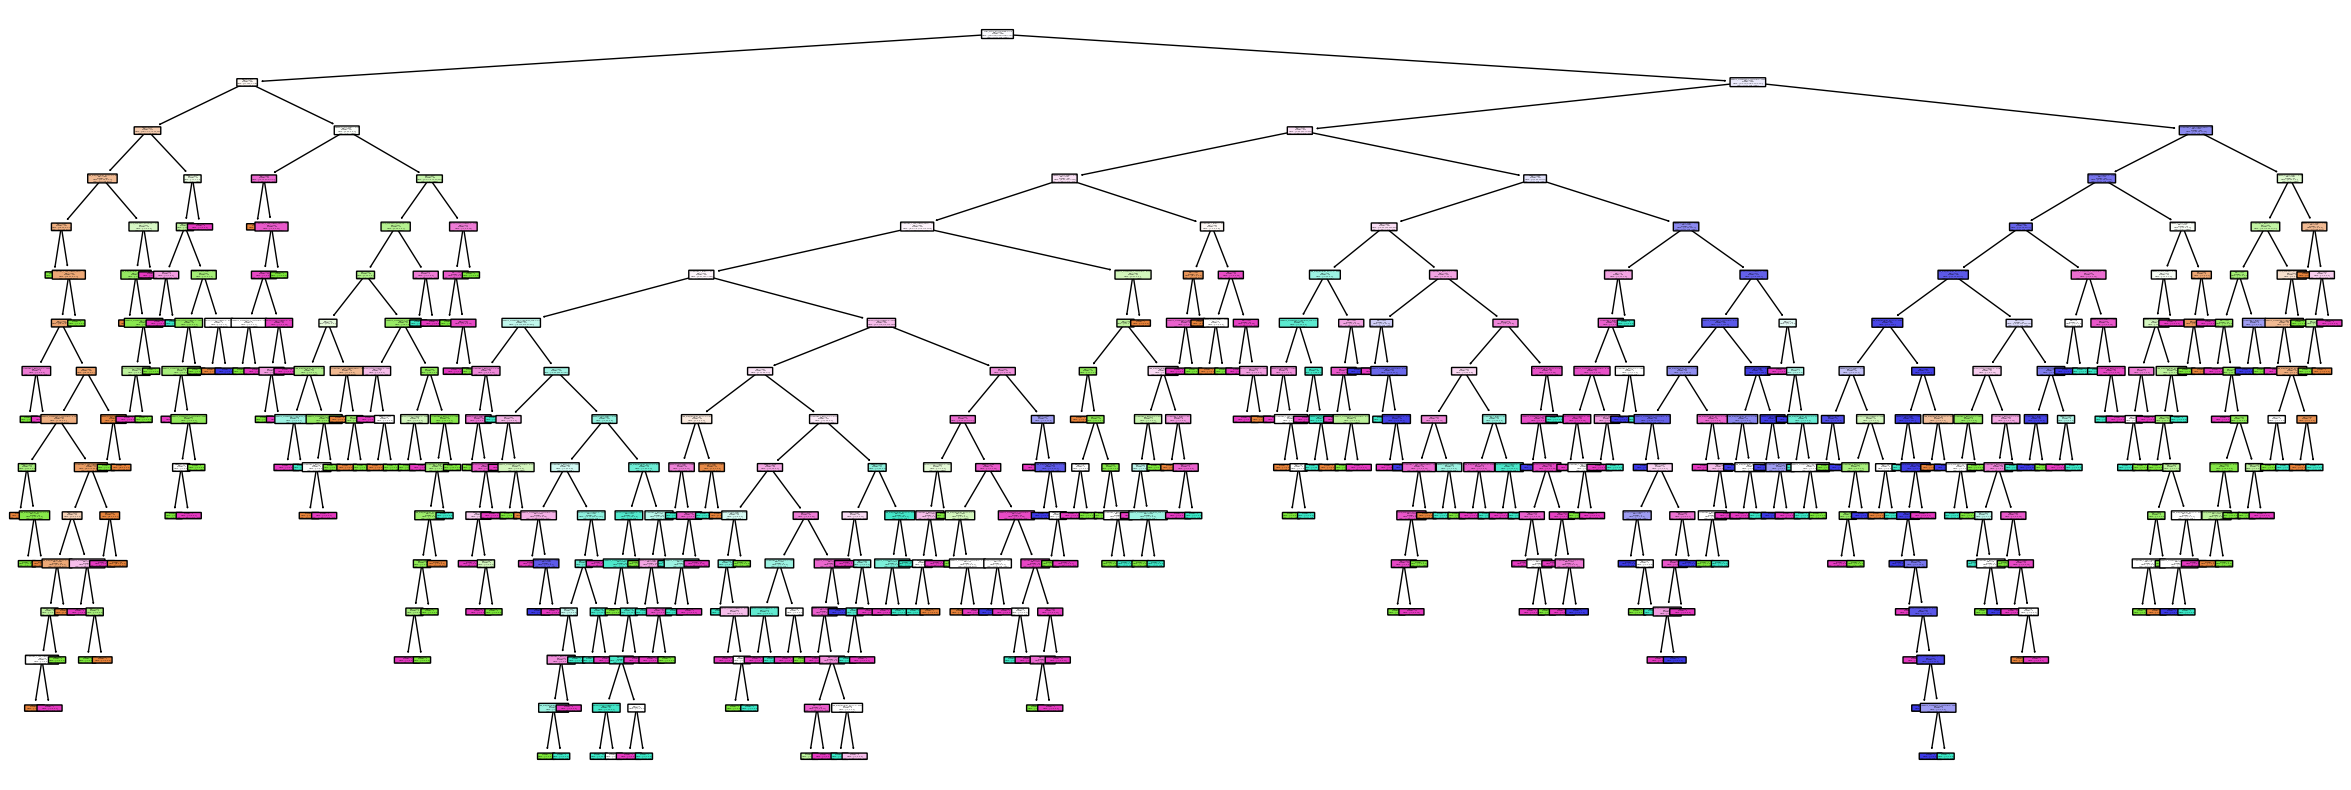

In [25]:
# Visualizing the resultant tree
plt.figure(figsize=(30,10))
tree.plot_tree(best_decision_tree.fit(X_train, y_train), feature_names = X.columns, filled = True,
               class_names=best_decision_tree.classes_,
               rounded = True)
print('Best CART Tree')

plt.show()

#### Model Evaluation

                           precision    recall  f1-score   support

      Insufficient_Weight       0.84      0.86      0.85        56
            Normal_Weight       0.59      0.47      0.52        62
           Obesity_Type_I       0.78      0.81      0.79        78
  Obesity_Type_II_and_III       0.91      0.95      0.93       121
Overweight_Level_I_and_II       0.69      0.71      0.70       106

                 accuracy                           0.78       423
                macro avg       0.76      0.76      0.76       423
             weighted avg       0.77      0.78      0.78       423



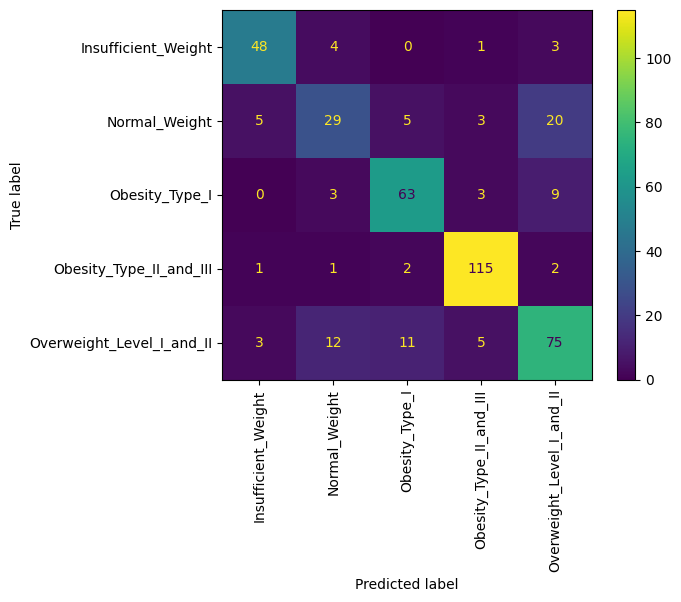

Importance Score
Feature: age, Importance: 0.15436596809938322
Feature: height, Importance: 0.14553424637166426
Feature: frequency_consumption_of_vegetables, Importance: 0.12569404196397305
Feature: number_of_main_meals, Importance: 0.10479217016836467
Feature: time_using_technology_devices, Importance: 0.08913419084548972
Feature: physical_activity_frequency, Importance: 0.08191940370396336
Feature: family_history_with_overweight, Importance: 0.06194670675089943
Feature: consumption_of_food_between_meals, Importance: 0.06007022085712904
Feature: consumption_of_water_daily, Importance: 0.05516480243832439
Feature: gender, Importance: 0.047622897911571614
Feature: consumption_of_alcohol, Importance: 0.037423765189291934
Feature: frequency_consumption_of_high_calorie_food, Importance: 0.02125437015748596
Feature: calorie_consumption_monitoring, Importance: 0.01430699045685305
Feature: smoker, Importance: 0.0007702250856064219


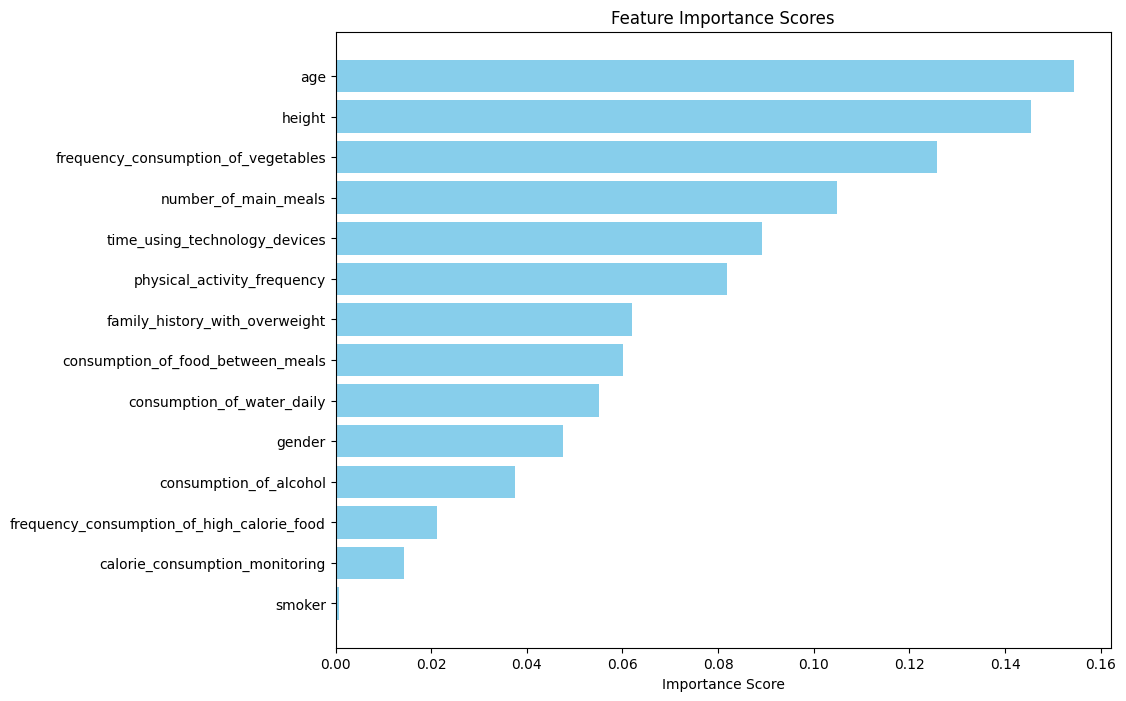

In [26]:
# Let's look at the model metrics
print(classification_report(y_test, y_pred))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_decision_tree.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

# Get feature importance
print("Importance Score")
feature_importance = best_decision_tree.feature_importances_

# Sort feature importance scores and corresponding feature names in descending order
sorted_features = sorted(zip(X_train.columns, feature_importance), key=lambda x: x[1], reverse=True)

# Print feature importance scores and corresponding feature names in descending order
for feature_name, importance_score in sorted_features:
    print(f"Feature: {feature_name}, Importance: {importance_score}")

feature_names, importance_scores = zip(*sorted_features)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # To have the highest importance score at the top of the chart
plt.show()

The model performs well inpredicting Insufficient Weight, Obesity Type I, II and III

The model performs relatively poorly in predicting Normal Weight & Overweight Level I and II

## Conclusion

Among the three models we discussed, the CART model has higher accuracy than the other two.

## Other Models - Not in Presentation

### Logistic Regression

#### Model Training

In [27]:
# Split the data into features (X) and target (y)
X = obesity_df.drop(['obesity','weight','transportation_mode'], axis=1)
y = obesity_df['obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Feature scaling for numerical features
num_cols = ['age', 'height', 'frequency_consumption_of_vegetables', 'number_of_main_meals', 
            'consumption_of_water_daily', 'physical_activity_frequency', 'time_using_technology_devices']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Create logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

#### Model Evalution

                           precision    recall  f1-score   support

      Insufficient_Weight       0.49      0.49      0.49        55
            Normal_Weight       0.61      0.38      0.47        58
           Obesity_Type_I       0.55      0.46      0.50        70
  Obesity_Type_II_and_III       0.65      0.85      0.74       124
Overweight_Level_I_and_II       0.49      0.47      0.48       116

                 accuracy                           0.57       423
                macro avg       0.56      0.53      0.54       423
             weighted avg       0.57      0.57      0.56       423



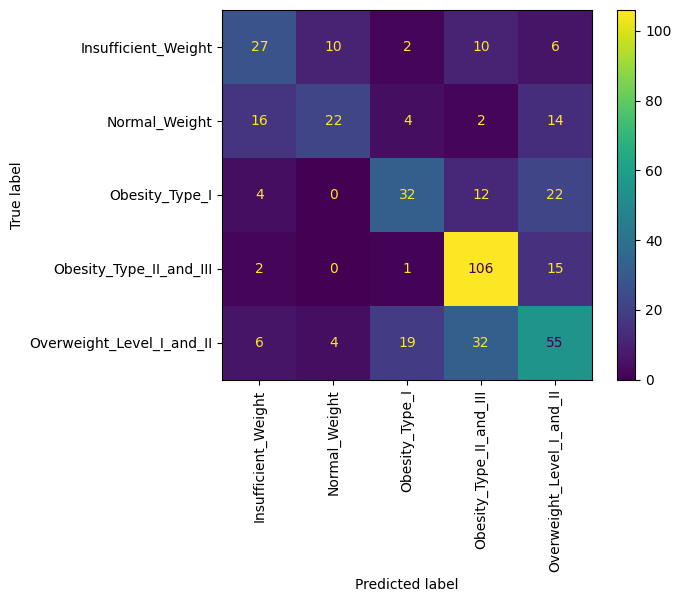

In [28]:
# Let's look at the model metrics
y_pred = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=logistic_regression.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

The model performs well inpredicting Obesity Type II and III

The model performs relatively poorly in predicting Normal Weight

### XGBoost Classifier

#### Model Training

In [41]:
# Split the data into features (X) and target (y)
X = obesity_df.drop(['obesity','weight','transportation_mode'], axis=1)
y = obesity_df['obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.replace({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I_and_II':2,
                'Obesity_Type_I':3, 'Obesity_Type_II_and_III':4})

# Feature scaling for numerical features
num_cols = ['age', 'height', 'frequency_consumption_of_vegetables', 'number_of_main_meals', 
            'consumption_of_water_daily', 'physical_activity_frequency', 'time_using_technology_devices']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier()

#Training the model on the training data
xgb_model.fit(X_train, y_train)

C:\Users\Weihan Weng\AppData\Local\Temp\ipykernel_8820\3641841471.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I_and_II':2,
C:\Users\Weihan Weng\AppData\Local\Temp\ipykernel_8820\3641841471.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_train = y_train.replace({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I_and_II':2,


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### Model Evaluation

Classification Report:
                           precision    recall  f1-score   support

      Insufficient_Weight       0.40      0.41      0.41        56
            Normal_Weight       0.12      0.03      0.05        62
           Obesity_Type_I       0.00      0.00      0.00        78
  Obesity_Type_II_and_III       0.58      0.93      0.71       121
Overweight_Level_I_and_II       0.33      0.48      0.39       106

                 accuracy                           0.44       423
                macro avg       0.29      0.37      0.31       423
             weighted avg       0.32      0.44      0.36       423



c:\Users\Weihan Weng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Weihan Weng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Weihan Weng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

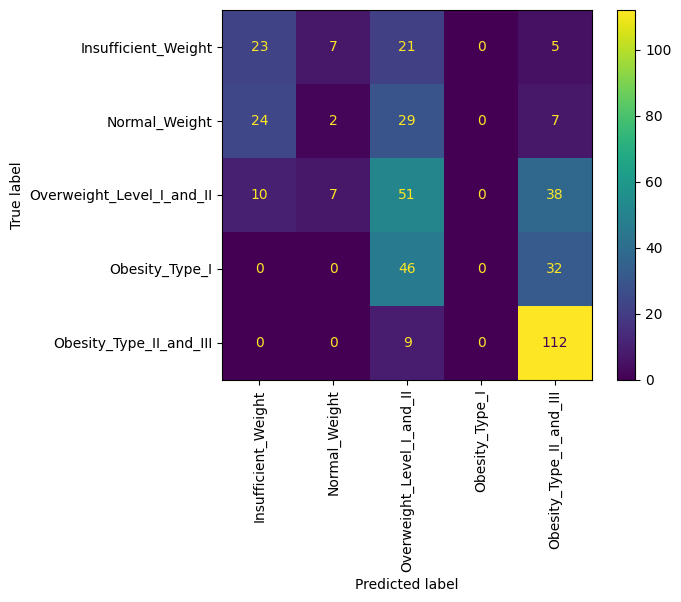

In [42]:
#Making predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_labels = y_pred_labels.replace({0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I_and_II',
                                       3:'Obesity_Type_I', 4:'Obesity_Type_II_and_III'})

# Check the output of the prediction
y_pred = res_log.predict(X_test)

y_pred_labels = y_pred.idxmax(axis=1)
y_pred_labels = y_pred_labels.replace({0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I_and_II',
                                       3:'Obesity_Type_I', 4:'Obesity_Type_II_and_III'})

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels, labels=obesity_levels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=obesity_levels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

The model performs well inpredicting Obesity Type II and III

The model performs relatively poorly in predicting Normal Weight and Obesity Type I

### Random Forest Classifier

#### Model Training

In [29]:
# Split the data into features (X) and target (y)
X = obesity_df.drop(['obesity','weight','transportation_mode'], axis=1)
y = obesity_df['obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for numerical features
num_cols = ['age', 'height', 'frequency_consumption_of_vegetables', 'number_of_main_meals', 
            'consumption_of_water_daily', 'physical_activity_frequency', 'time_using_technology_devices']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Define parameters for Random Forest
parameters = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 12, 15],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Build GridSearchCV
gs = GridSearchCV(estimator=random_forest, param_grid=parameters, cv=4)

# Train and fit the model
gs.fit(X_train, y_train)

# See the best parameters
print(gs.best_params_)

# Get the best model
best_random_forest = gs.best_estimator_

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


#### Model Evaluation

                           precision    recall  f1-score   support

      Insufficient_Weight       0.93      0.91      0.92        56
            Normal_Weight       0.69      0.74      0.71        62
           Obesity_Type_I       0.96      0.82      0.88        78
  Obesity_Type_II_and_III       0.95      0.98      0.96       121
Overweight_Level_I_and_II       0.82      0.85      0.83       106

                 accuracy                           0.87       423
                macro avg       0.87      0.86      0.86       423
             weighted avg       0.88      0.87      0.87       423



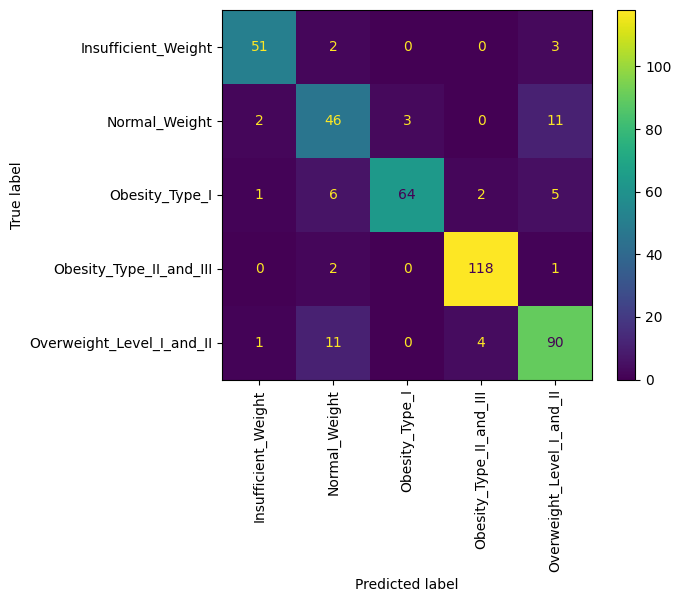

In [30]:
# Let's look at the model metrics
y_pred = best_random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_random_forest.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_random_forest.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

It can be found that random forest classification is the model with the highest accuracy.